In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Python/Data_Analytics_with_Python/Cohort_Analysis/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np


1. **Definition and Purpose**: Cohort analysis groups data by common characteristics to analyze and understand user behavior, improving customer retention and lifecycle analysis.

2. **Tools and Reports**: Utilizes analytical tools like Google Analytics to generate cohort analysis reports, aiding in the comparison of user group performance across different lifecycle stages.

3. **Business and Marketing Applications**: Vital for identifying trends in customer behavior and website performance, which can inform strategic business and marketing decisions.

4. **Public Health Applications**: Applied in public health for contact tracing during pandemics, using spatiotemporal data to track individual movements and interactions.

5. **HEAVY.AI Solution**: HEAVY.AI's Immerse platform offers advanced spatiotemporal cohort analysis capabilities, allowing for detailed data visualization and interactive analysis.


1. **Tərif və Məqsəd**: Kohort təhlili, istifadəçi davranışlarını analiz etmək və anlamaq, müştəri saxlanmasını və həyat dövrü analizini yaxşılaşdırmaq üçün məlumatları ortaq xüsusiyyətlərə görə qruplaşdırır.

2. **Alətlər və Hesabatlar**: İstifadəçi qruplarının müxtəlif həyat dövrü mərhələlərində performansını müqayisə etməyə kömək edən, Google Analytics kimi analitik alətlərdən istifadə edərək kohort təhlili hesabatları yaradır.

3. **Biznes və Marketinq Tətbiqləri**: Müştəri davranışları və veb saytın performansı üzrə trendləri müəyyən etmək üçün vacibdir, bu da strateji biznes və marketinq qərarlarını məlumatlandıra bilər.

4. **İctimai Sağlamlıq Tətbiqləri**: Pandemiyalar zamanı əlaqə izləmə üçün ictimai sağlamlıqda tətbiq olunur, fərdlərin hərəkətlərini və qarşılıqlı təsirlərini izləmək üçün spasiotemporal məlumatlardan istifadə edir.

5. **HEAVY.AI Həlli**: HEAVY.AI-nin Immerse platforması, ətraflı məlumat vizuallaşdırılması və qarşılıqlı təhlil üçün geniş spasiotemporal kohort təhlil imkanları təklif edir.


In [ ]:
df = pd.read_csv("dataset/year_2009-2010.csv", encoding="latin-1")

In [ ]:
df.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
324445,520998,21241,GREEN SPOTTY CUP,4,9/1/2010 13:39,1.66,NaN,United Kingdom
375330,525698,21903,MAN FLU METAL SIGN,12,10/6/2010 12:36,2.10,12668.0,Germany
123964,501176,48116,DOOR MAT MULTICOLOUR STRIPE,2,3/15/2010 11:00,7.49,14857.0,United Kingdom
190673,507426,22383,LUNCH BAG SUKI DESIGN,10,5/9/2010 15:33,1.65,12361.0,Belgium
54834,494381,21481,FAWN BLUE HOT WATER BOTTLE,1,1/13/2010 17:44,5.91,NaN,United Kingdom


In [ ]:
orders=df[["InvoiceDate", "Customer ID", "Price" , "Quantity", "Invoice", "Description"]]

In [ ]:
orders.head()

,InvoiceDate,Customer ID,Price,Quantity,Invoice,Description
0,12/1/2009 7:45,13085.0,6.95,12,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,12/1/2009 7:45,13085.0,6.75,12,489434,PINK CHERRY LIGHTS
2,12/1/2009 7:45,13085.0,6.75,12,489434,WHITE CHERRY LIGHTS
3,12/1/2009 7:45,13085.0,2.10,48,489434,"RECORD FRAME 7"" SINGLE SIZE"
4,12/1/2009 7:45,13085.0,1.25,24,489434,STRAWBERRY CERAMIC TRINKET BOX


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceDate  525461 non-null  object 
 1   Customer ID  417534 non-null  float64
 2   Price        525461 non-null  float64
 3   Quantity     525461 non-null  int64  
 4   Invoice      525461 non-null  object 
 5   Description  522533 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.1+ MB


In [ ]:
orders.isna().mean()*100

,0
InvoiceDate,0.000000
Customer ID,20.539488
Price,0.000000
Quantity,0.000000
Invoice,0.000000
Description,0.557225


In [ ]:
orders.dropna(inplace=True);

<ipython-input-530-c582c5bacfc3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
orders.duplicated().sum()

np.int64(6843)

In [ ]:
orders=orders.drop_duplicates()

In [ ]:
orders["revenue"]=orders["Price"]*orders["Quantity"]

<ipython-input-533-f12b4aca9a6e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
orders.rename(columns={"Customer ID":"customer_id", "InvoiceDate":"order_date", "Invoice": "order_id"}, inplace=True)
orders.drop(columns=["Price", "Quantity"], inplace=True)

<ipython-input-534-bb0ae1bb2aee>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-534-bb0ae1bb2aee>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
orders.head()

,order_date,customer_id,order_id,Description,revenue
0,12/1/2009 7:45,13085.0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,83.4
1,12/1/2009 7:45,13085.0,489434,PINK CHERRY LIGHTS,81.0
2,12/1/2009 7:45,13085.0,489434,WHITE CHERRY LIGHTS,81.0
3,12/1/2009 7:45,13085.0,489434,"RECORD FRAME 7"" SINGLE SIZE",100.8
4,12/1/2009 7:45,13085.0,489434,STRAWBERRY CERAMIC TRINKET BOX,30.0


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410691 entries, 0 to 525460
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   order_date   410691 non-null  object 
 1   customer_id  410691 non-null  float64
 2   order_id     410691 non-null  object 
 3   Description  410691 non-null  object 
 4   revenue      410691 non-null  float64
dtypes: float64(2), object(3)
memory usage: 18.8+ MB


In [ ]:
orders["customer_id"]=orders["customer_id"].astype("int")
orders['order_date'] = pd.to_datetime(orders['order_date'])

<ipython-input-537-ab061bfaf28f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
first_order_date_by_customers = orders.groupby('customer_id')[
    'order_date'
].min()
print(first_order_date_by_customers.head())

customer_id
12346   2009-12-14 08:34:00
12347   2010-10-31 14:20:00
12348   2010-09-27 14:59:00
12349   2009-12-04 12:49:00
12351   2010-11-29 15:23:00
Name: order_date, dtype: datetime64[ns]


In [ ]:
first_order_date_by_customers

,order_date
customer_id,
12346,2009-12-14 08:34:00
12347,2010-10-31 14:20:00
12348,2010-09-27 14:59:00
12349,2009-12-04 12:49:00
12351,2010-11-29 15:23:00
...,...
18283,2010-02-19 17:16:00
18284,2010-10-04 11:33:00
18285,2010-02-17 10:24:00


In [ ]:
first_order_date_by_customers.name = 'first_order_date'

In [ ]:
orders = orders.join(first_order_date_by_customers,on='customer_id')
print(orders.head(10))

           order_date  customer_id order_id  \
0 2009-12-01 07:45:00        13085   489434   
1 2009-12-01 07:45:00        13085   489434   
2 2009-12-01 07:45:00        13085   489434   
3 2009-12-01 07:45:00        13085   489434   
4 2009-12-01 07:45:00        13085   489434   
5 2009-12-01 07:45:00        13085   489434   
6 2009-12-01 07:45:00        13085   489434   
7 2009-12-01 07:45:00        13085   489434   
8 2009-12-01 07:46:00        13085   489435   
9 2009-12-01 07:46:00        13085   489435   

                           Description  revenue    first_order_date  
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS     83.4 2009-12-01 07:45:00  
1                   PINK CHERRY LIGHTS     81.0 2009-12-01 07:45:00  
2                  WHITE CHERRY LIGHTS     81.0 2009-12-01 07:45:00  
3         RECORD FRAME 7" SINGLE SIZE     100.8 2009-12-01 07:45:00  
4       STRAWBERRY CERAMIC TRINKET BOX     30.0 2009-12-01 07:45:00  
5           PINK DOUGHNUT TRINKET POT      39.6 2009-12-01 07:

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410691 entries, 0 to 525460
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_date        410691 non-null  datetime64[ns]
 1   customer_id       410691 non-null  int64         
 2   order_id          410691 non-null  object        
 3   Description       410691 non-null  object        
 4   revenue           410691 non-null  float64       
 5   first_order_date  410691 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 21.9+ MB


In [ ]:
# Convert columns to datetime format first
orders['first_order_date'] = pd.to_datetime(orders['first_order_date'])
orders['order_date'] = pd.to_datetime(orders['order_date'])

# Then extract the month part
orders['first_order_month'] = orders['first_order_date'].dt.to_period('M')
orders['order_month'] = orders['order_date'].dt.to_period('M')

orders.head()



,order_date,customer_id,order_id,Description,revenue,first_order_date,first_order_month,order_month
0,2009-12-01 07:45:00,13085,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,83.4,2009-12-01 07:45:00,2009-12,2009-12
1,2009-12-01 07:45:00,13085,489434,PINK CHERRY LIGHTS,81.0,2009-12-01 07:45:00,2009-12,2009-12
2,2009-12-01 07:45:00,13085,489434,WHITE CHERRY LIGHTS,81.0,2009-12-01 07:45:00,2009-12,2009-12
3,2009-12-01 07:45:00,13085,489434,"RECORD FRAME 7"" SINGLE SIZE",100.8,2009-12-01 07:45:00,2009-12,2009-12
4,2009-12-01 07:45:00,13085,489434,STRAWBERRY CERAMIC TRINKET BOX,30.0,2009-12-01 07:45:00,2009-12,2009-12


In [ ]:
cohort_grouped = orders.groupby('first_order_month').agg(
    {'order_id': 'nunique', 'customer_id': 'nunique', 'revenue': 'sum'}
).rename(columns={"order_id": "uni_num_order", "customer_id": "uni_num_customer"})

print(cohort_grouped)


                   uni_num_order  uni_num_customer      revenue
first_order_month                                              
2009-12                    12005              1045  4851269.725
2010-01                     2241               394   700035.194
2010-02                     1812               363   556049.123
2010-03                     2016               436   613494.541
2010-04                     1011               291   277829.631
2010-05                      774               254   219888.650
2010-06                      819               269   227788.780
2010-07                      606               183   148110.450
2010-08                      472               158   126026.090
2010-09                      575               242   210896.560
2010-10                      712               379   210419.100
2010-11                      493               322   159915.370
2010-12                       51                47    12638.490


Cohorts are always the grouping by the starting event (the first order), and they live on the index.

An **absolute** value is the volume, size, or magnitude of an observed event or phenomenon. It can be, for example, a total price in dollars or total purchases in units.

## Relative value

If we divide the total cost of all purchases by the number of purchases, we'll get the average price for a product. This will be a relative value, which gives the ratio between two other values.

When calculating relative values, it's crucial that their components be linked. For example, the total cost of all purchases can be divided by the number of purchases: these values are relevant to each other. But the ratio between purchase size and steps taken to get to the store doesn't help much with product analytics.



No Logical or Causal Connection
- Purchase size is driven by factors like product price, household need, promotions, seasonality, etc.
- Steps taken is influenced by where people live, their mode of transport, urban design, personal fitness habits, even weather.
Since there’s no underlying mechanism that directly ties how many steps you walked to how much you choose to spend, their ratio carries no interpretable meaning.

Lack of Actionability
- Good product‑analytics metrics should point to something you can influence: e.g. pricing, assortment, marketing tactics, store layout.
- You can’t meaningfully “optimize” the ratio of purchase‐size to step‐count—raising the denominator (steps) or lowering the numerator (spend) doesn’t map to a strategic lever.

Risk of Spurious Correlation
- When you combine unrelated quantities in a ratio, random noise or coincidental patterns may dominate.
- Any observed trends are likely statistical artifacts rather than real, reproducible phenomena you can act upon.

Metric Validity & Interpretability
- A ratio only makes sense if both parts measure the same concept in different units or two tightly linked concepts (e.g. revenue ÷ orders = average order value).
- “Steps” and “dollars” don’t share a common scale, construct, or domain—so you can’t give the resulting number a clear, intuitive story.

The first task that can be solved using cohort analysis is tracking changes in the number of active buyers within a single cohort. This will tell us how many people continue making purchases in the months following the month of the first purchase. Let's create a pivot table using the pivot_table() method:

- The rows (index) will contain a user cohort: first_order_month
- The columns (columns) will be the purchase months: order_month
- The values (values) will be the numbers of unique users (customer_id) who made their first purchases on the online store
- we'll indicate 'nunique' in the argument aggfunc


In [ ]:
orders.pivot_table(
    index='first_order_month',
    columns='order_month',
    values='customer_id',
    aggfunc='nunique',
)

order_month,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12
first_order_month,,,,,,,,,,,,,
2009-12,1045.0,392.0,358.0,447.0,410.0,408.0,408.0,374.0,355.0,392.0,452.0,518.0,260.0
2010-01,NaN,394.0,86.0,119.0,120.0,110.0,115.0,105.0,91.0,114.0,134.0,122.0,37.0
2010-02,NaN,NaN,363.0,109.0,82.0,110.0,93.0,76.0,79.0,103.0,100.0,106.0,32.0
2010-03,NaN,NaN,NaN,436.0,95.0,113.0,103.0,100.0,87.0,105.0,130.0,126.0,36.0
2010-04,NaN,NaN,NaN,NaN,291.0,67.0,58.0,47.0,54.0,67.0,79.0,76.0,22.0
2010-05,NaN,NaN,NaN,NaN,NaN,254.0,49.0,45.0,49.0,48.0,66.0,56.0,22.0
2010-06,NaN,NaN,NaN,NaN,NaN,NaN,269.0,58.0,53.0,55.0,62.0,76.0,20.0
2010-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.0,38.0,37.0,52.0,55.0,21.0
2010-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.0,39.0,50.0,51.0,20.0


Key Conclusions
Steep Initial Drop‑Off (Churn)

You go from 108 buyers in June 2020 down to 20 in July — that’s an ~82% loss of that cohort in just one month.

If your goal is long‑term engagement, this signals that most users aren’t coming back immediately after their first purchase.

Plateau of Core Users

After the initial drop into July, the counts actually hold around 20‑28 customers for several months (August, September, October), suggesting a loyal core of roughly 20–25% of the original cohort.

This plateau tells you that once someone survives that first “critical month,” they’re more likely to stick around for a while.

Long‑Term Decay

By month 12 (June 2021), you’re down to just 5 customers (~5% of the original 108).

This ongoing decline beyond the plateau shows that even “core” users gradually churn over the long haul.

Implications for Product & Marketing

The first month after acquisition is your biggest risk window: focus on onboarding, targeted promotions, or personalized follow‑ups to reduce that 82% drop.

For the ~20–25% who make it past month 1, nurturing programs (loyalty tiers, re‑order reminders) can help extend their lifetime value before the long‑tail decay kicks in.

**Why Absolute vs. Relative Matters**
- Absolute counts tell you head‑counts, but they mix cohort size with retention.

- To compare cohorts of different sizes (e.g., June 2020 vs. September 2020), you’ll want to divide each row by its first‑column value (e.g. 20 / 108 ≈ 18.5% retention in month 1).

- That gives you retention rates, which are easier to benchmark over time or between cohorts.

# **ARPU** (average revenue per user)


Another task of cohort analysis is to find out how the average revenue per user (total sales divided by the number of customers) changes over time. This will give us insight into whether the average revenue from users who continue making orders is increasing or not.

In [ ]:
orders_grouped_by_cohorts = orders.groupby(
    ['first_order_month', 'order_month']
).agg({'revenue': 'sum', 'customer_id': 'nunique'}).rename(columns={"customer_id": "uni_num_customer"})
orders_grouped_by_cohorts.head()

revenue  uni_num_customer
first_order_month order_month                              
2009-12           2009-12      660087.600              1045
                  2010-01      380348.211               392
                  2010-02      293017.932               358
                  2010-03      385806.840               447
                  2010-04      303765.020               410

In [ ]:
orders_grouped_by_cohorts.tail()

revenue  uni_num_customer
first_order_month order_month                             
2010-10           2010-11       39812.42               112
                  2010-12        8814.94                39
2010-11           2010-11      148427.01               322
                  2010-12       11488.36                38
2010-12           2010-12       12638.49                47

In [ ]:
orders_grouped_by_cohorts.loc["2010-10"].sort_values("uni_num_customer", ascending=False)

,revenue,uni_num_customer
order_month,,
2010-10,161791.74,379
2010-11,39812.42,112
2010-12,8814.94,39


Let's find revenue_per_user. We'll need to divide revenue by the number of customer_id values:

In [ ]:
orders_grouped_by_cohorts['revenue_per_user'] = (
    orders_grouped_by_cohorts['revenue']
    / orders_grouped_by_cohorts['uni_num_customer']
)

In [ ]:
orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='order_month',
    values='revenue_per_user',
    aggfunc='mean',
)

order_month,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12
first_order_month,,,,,,,,,,,,,
2009-12,631.662775,970.276048,818.485844,863.102550,740.890293,711.581667,752.841152,843.766551,944.010169,948.328291,981.249934,1102.689927,744.631808
2010-01,NaN,380.804114,434.838500,425.118908,460.767342,472.922455,484.299043,412.087714,470.958242,464.929746,543.987090,596.830574,382.950541
2010-02,NaN,NaN,432.844306,272.501468,606.411220,433.595182,434.002473,482.411184,463.378987,441.764757,506.185100,498.830566,286.689062
2010-03,NaN,NaN,NaN,383.427548,477.379474,400.097611,499.281650,441.274900,560.862069,555.734381,559.872615,534.313413,359.736389
2010-04,NaN,NaN,NaN,NaN,356.882168,235.364179,310.991724,549.253404,379.418704,459.827313,398.785443,358.184474,196.908182
2010-05,NaN,NaN,NaN,NaN,NaN,420.406299,286.462653,299.640222,256.007143,338.964792,466.404545,387.658036,194.489091
2010-06,NaN,NaN,NaN,NaN,NaN,NaN,304.994572,206.728103,420.207170,435.447636,516.323226,614.581842,440.707500
2010-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382.064153,200.675526,362.387297,443.827692,497.076545,320.974286
2010-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.067089,345.576667,454.535800,446.076275,406.366000


. Initial Spend Is Highest
The first active month of a cohort typically shows the highest ARPU.

E.g. Dec 2020 (ARPU ≈ 166.65), Nov 2020 (≈ 141.16), Feb 2021 (≈ 156.15).

2. ARPU Declines Over Time
After that first month, average spend per returning user falls as the cohort ages.

By 6–12 months out, ARPU often drops into the ₤50–100 range.

3. Seasonal & Cohort‑Specific Spikes
You see spikes in certain months across cohorts:

Holiday peaks (Dec 2020) and post‑New Year (Feb 2021) reflect bigger baskets.

Slower sales in mid‑summer or deep into the year (e.g. June 2022 ARPU ≈ 54.99).

4. Long‑Term Tail
By the later months (18–24 months out), ARPU can be very low—even single users with modest spend.

What This Tells Us
“Window of Opportunity”

The month of acquisition (and the one immediately after) is your best chance to maximize average order value—targeted upsells or bundles here pay off most.

Retention vs. Monetization Trade‑off

Even though fewer users remain, maintaining or boosting ARPU among the “core” returning segment (months 2–6) can improve overall lifetime value.

Seasonal Planning

Plan promotions around recurring high‑ARPU periods (holidays, new‑year refresh) to lift both return rate and basket size.

Cohort‑Tail Strategies

After the ARPU decay “tail,” consider reactivation campaigns or loyalty perks to re‑engage those sporadic late‑stage returners.

# **lifetime**

But what if we need to assess changes in revenue per user in relation to the time that's passed since the first purchase? In the context of cohorts, this figure is called the lifetime. It shows which month an event occurred in terms of distance from the cohort month. Let's look at the lifetime of the cohort of customers who made their first purchases in December 2011.

- Purchases made in December 2011 were made in the 0th lifetime month.
- Purchases made in January 2012 were made in the 1st lifetime month

In [ ]:
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = (
    orders_grouped_by_cohorts['order_month']
    - orders_grouped_by_cohorts['first_order_month']
)
orders_grouped_by_cohorts['cohort_lifetime']=orders_grouped_by_cohorts['cohort_lifetime'].apply(lambda x: x.n)

In [ ]:
orders_grouped_by_cohorts.sample()

,first_order_month,order_month,revenue,uni_num_customer,revenue_per_user,cohort_lifetime
70,2010-07,2010-07,69917.74,183,382.064153,0


In [ ]:
orders_grouped_by_cohorts.sort_values("cohort_lifetime", ascending=False).head()


,first_order_month,order_month,revenue,uni_num_customer,revenue_per_user,cohort_lifetime
12,2009-12,2010-12,193604.270,260,744.631808,12
11,2009-12,2010-11,571193.382,518,1102.689927,11
24,2010-01,2010-12,14169.170,37,382.950541,11
23,2010-01,2010-11,72813.330,122,596.830574,10
10,2009-12,2010-10,443524.970,452,981.249934,10


In [ ]:
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue_per_user',
    aggfunc='mean',
)
revenue_per_user_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
first_order_month,,,,,,,,,,,,,
2009-12,631.662775,970.276048,818.485844,863.102550,740.890293,711.581667,752.841152,843.766551,944.010169,948.328291,981.249934,1102.689927,744.631808
2010-01,380.804114,434.838500,425.118908,460.767342,472.922455,484.299043,412.087714,470.958242,464.929746,543.987090,596.830574,382.950541,NaN
2010-02,432.844306,272.501468,606.411220,433.595182,434.002473,482.411184,463.378987,441.764757,506.185100,498.830566,286.689062,NaN,NaN
2010-03,383.427548,477.379474,400.097611,499.281650,441.274900,560.862069,555.734381,559.872615,534.313413,359.736389,NaN,NaN,NaN
2010-04,356.882168,235.364179,310.991724,549.253404,379.418704,459.827313,398.785443,358.184474,196.908182,NaN,NaN,NaN,NaN
2010-05,420.406299,286.462653,299.640222,256.007143,338.964792,466.404545,387.658036,194.489091,NaN,NaN,NaN,NaN,NaN
2010-06,304.994572,206.728103,420.207170,435.447636,516.323226,614.581842,440.707500,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,382.064153,200.675526,362.387297,443.827692,497.076545,320.974286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,373.067089,345.576667,454.535800,446.076275,406.366000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we see clearly for which cohorts revenue per user increased in the month following the month of first purchase.

# heatmap

It's hard to draw conclusions from it: the values look dull and uniform, nothing really catches the eye. But if we turn the table into a heatmap by adding colors, the trends and patterns will become more obvious.

A heatmap is a table visualization where cells vary in color depending on their proximity to the maximum and minimum values. Here's a table that shows clear seasonality in demand for goods and services:

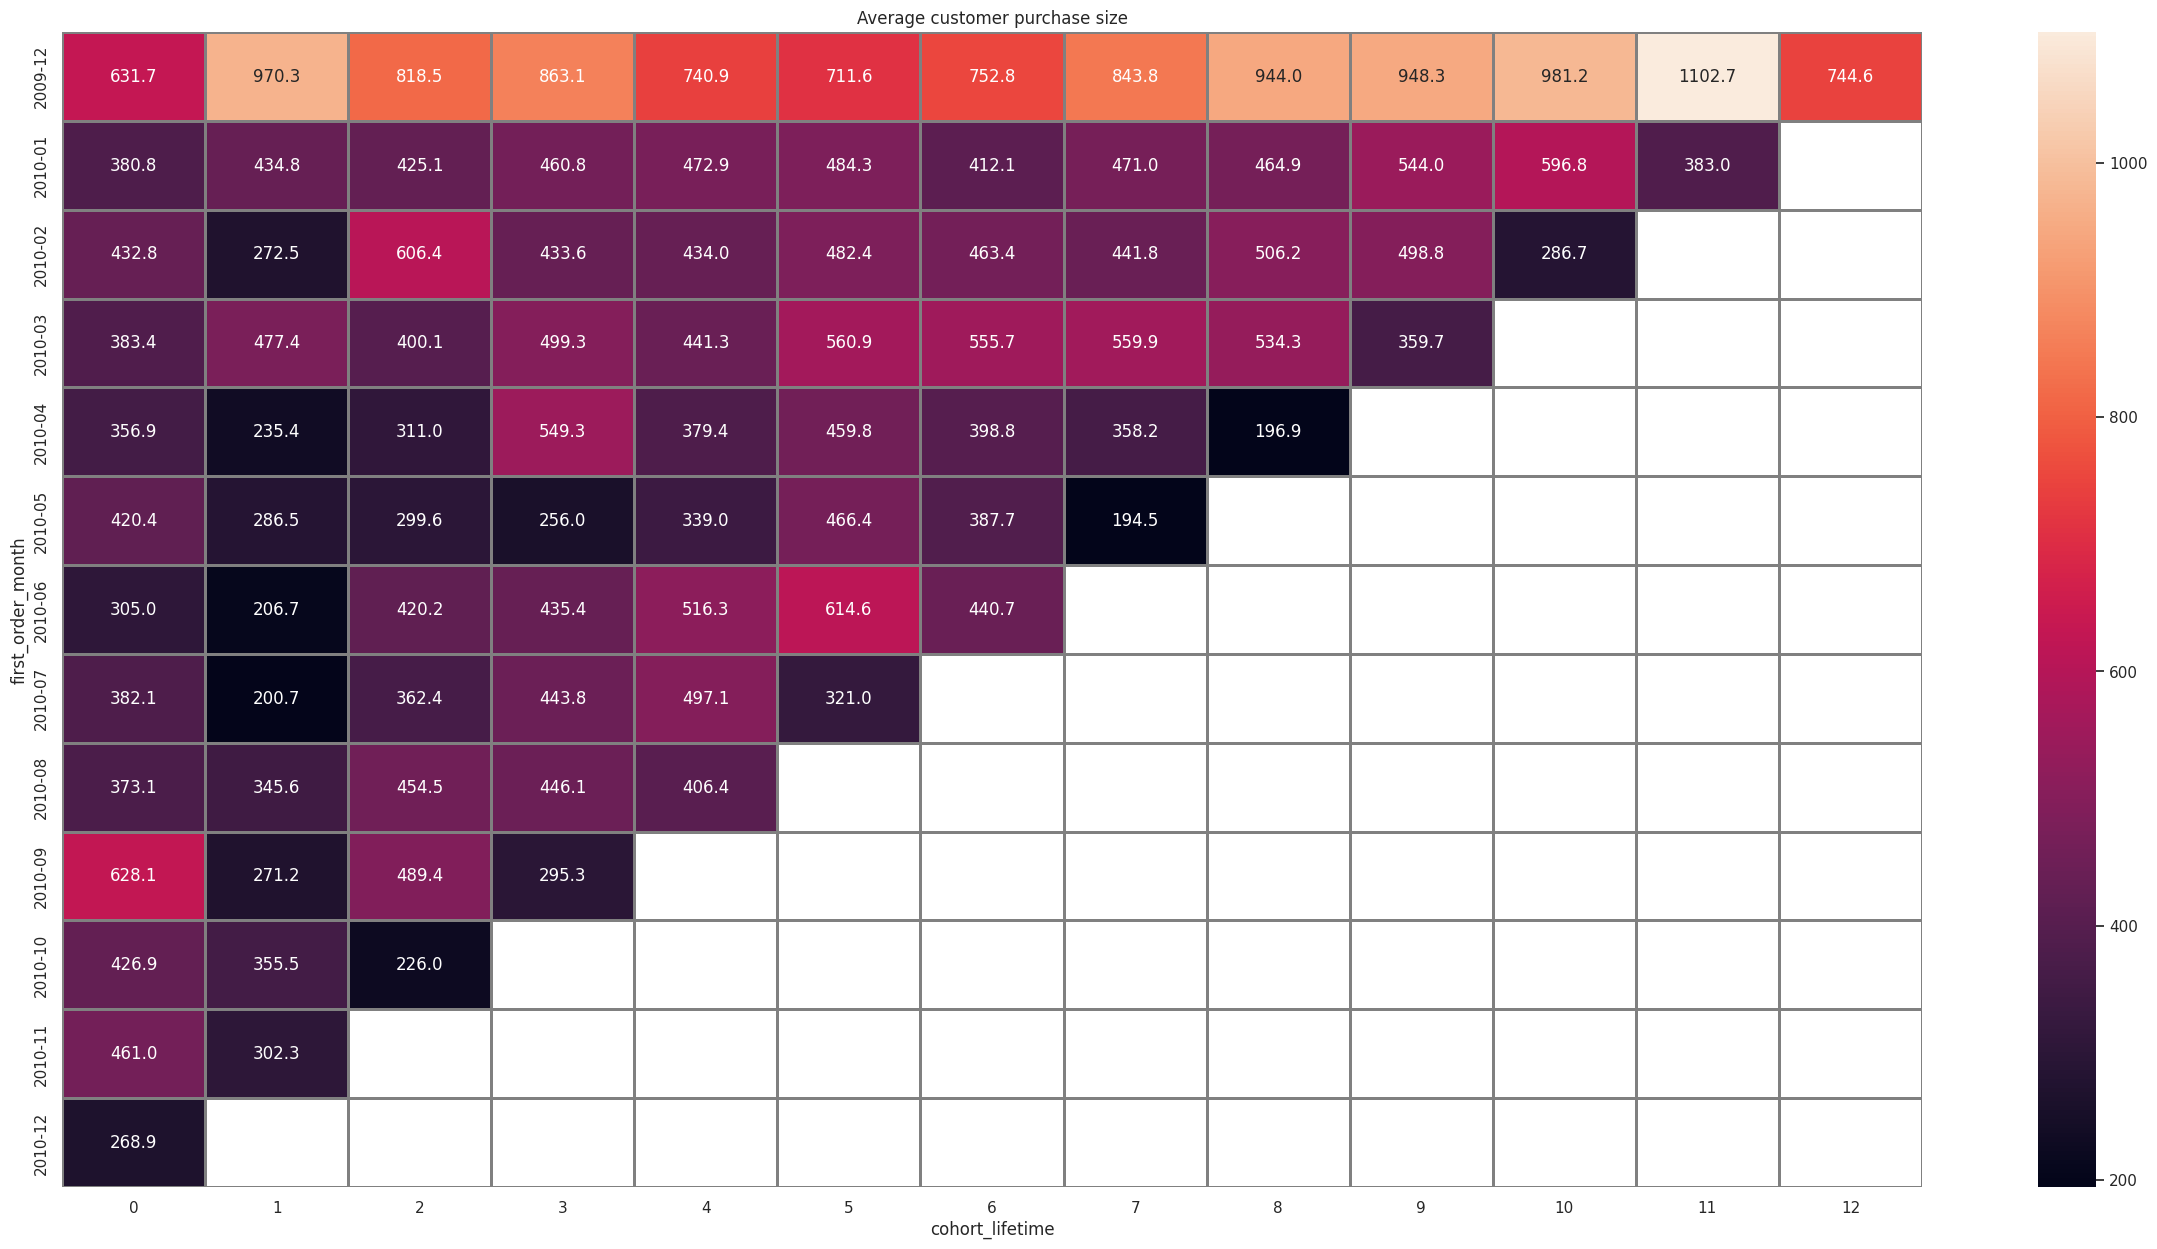

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(30, 15))
plt.title('Average customer purchase size')
sns.heatmap(
    revenue_per_user_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
);

- annot=True (annotate), which means the value will be displayed for each cell
fmt='.1f' (format), which sets the printing format (here, one decimal place)
- linewidths=1, which sets the width of the line separating heatmap cells (1 pixel);
- linecolor='gray', which sets the line color to gray.

# **Retention Rate and Churn Rate**

Customers come and go. Your task is to track this and calculate metrics.

Cohort analysis is used to analyze user behavior for digital products. Retention rate and churn rate are the metrics most often evaluated.

Retention rate

The retention rate tells you how many users from a cohort have remained active compared to their initial number.

The retention rate is also crucial for products where the primary source of income is advertising. The longer customers use the service, the more impressions the ads will get.

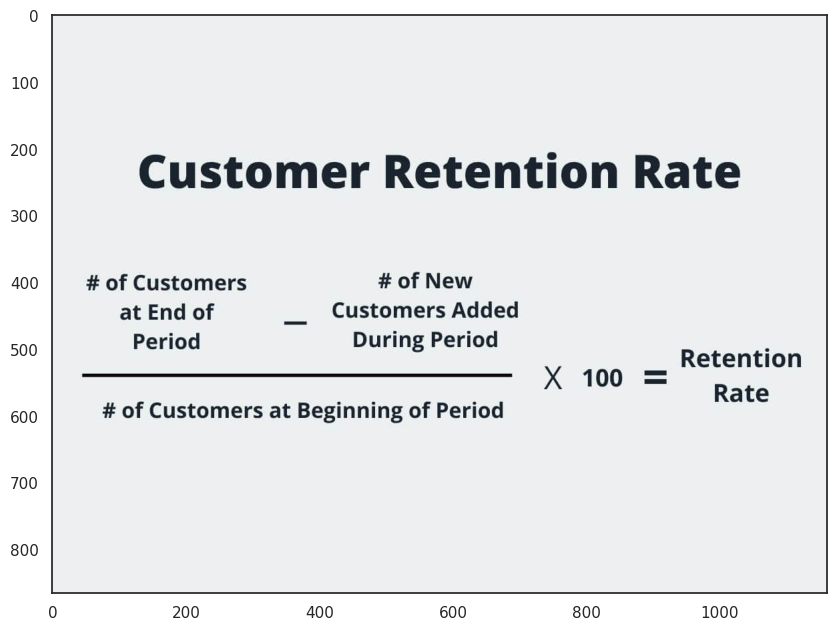

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('documents/customer-retention-rate.jpeg')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

# Retention Rate Formula

**Retention Rate at _n_-th month:**

$$
\text{RetentionRate}_{n} \;=\;
\frac{\displaystyle \text{ActiveUsers}_{n}}
     {\displaystyle \text{ActiveUsers}_{0}}
\times 100\%
$$

- where  
  - \(\text{ActiveUsers}_{n}\) is the number of users active in the cohort’s \(n\)-th month,  
  - \(\text{ActiveUsers}_{0}\) is the number of users in the cohort at month 0 (initial acquisition).  



İf could be  that we calculate the Retention rate not just for a month however for week , the reason could be thar  the compnaies want to know the fast result , they do not want to see the month result howwever the weekly result . Therefore we need to create not month cohort however  the weekly cohort

In previous lessons you formed monthly cohorts. However, the timespan used when forming cohorts can change depending on how urgently the business needs to decide whether to modify its product.  

In [ ]:
orders.head()

,order_date,customer_id,order_id,Description,revenue,first_order_date,first_order_month,order_month
0,2009-12-01 07:45:00,13085,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,83.4,2009-12-01 07:45:00,2009-12,2009-12
1,2009-12-01 07:45:00,13085,489434,PINK CHERRY LIGHTS,81.0,2009-12-01 07:45:00,2009-12,2009-12
2,2009-12-01 07:45:00,13085,489434,WHITE CHERRY LIGHTS,81.0,2009-12-01 07:45:00,2009-12,2009-12
3,2009-12-01 07:45:00,13085,489434,"RECORD FRAME 7"" SINGLE SIZE",100.8,2009-12-01 07:45:00,2009-12,2009-12
4,2009-12-01 07:45:00,13085,489434,STRAWBERRY CERAMIC TRINKET BOX,30.0,2009-12-01 07:45:00,2009-12,2009-12


In [ ]:
orders.drop(columns=["first_order_month", "order_month"], axis=1, inplace=True)

In [ ]:
orders.sample(5)

,order_date,customer_id,order_id,Description,revenue,first_order_date
481833,2010-11-23 11:47:00,17071,534511,DOORMAT ENGLISH ROSE,15.9,2010-01-24 13:05:00
471159,2010-11-18 15:53:00,12467,C533774,WRAP CHRISTMAS VILLAGE,-10.5,2010-10-12 15:41:00
345028,2010-09-19 14:51:00,17625,522987,GLITTER CHRISTMAS TREE WITH BELLS,11.7,2009-12-15 11:49:00
124764,2010-03-15 16:35:00,14062,501300,RED/WHITE DOTS RUFFLED UMBRELLA,11.9,2009-12-10 14:28:00
496460,2010-11-28 15:45:00,18061,535819,DOORMAT UNION FLAG,47.7,2009-12-04 11:36:00


In previous lessons you formed monthly cohorts. However, the timespan used when forming cohorts can change depending on how urgently the business needs to decide whether to modify its product.  

In [ ]:
orders['order_date'].dt.weekday.sample(5)

,order_date
326882,4
19200,1
147976,3
21207,2
142724,0


 0 (Monday) to 6 (Sunday).

In [ ]:
orders['buy_week'] = (orders['order_date']- pd.to_timedelta(orders['order_date'].dt.weekday, unit='d')).dt.normalize()

In [ ]:
orders.sample(5)

,order_date,customer_id,order_id,Description,revenue,first_order_date,buy_week
405998,2010-10-21 11:56:00,16992,528276,CHILLI LIGHTS,39.60,2010-02-11 12:36:00,2010-10-18
197495,2010-05-14 12:52:00,16836,508359,TEA COSY VINTAGE UNION JACK,15.00,2010-05-14 12:52:00,2010-05-10
451001,2010-11-11 13:27:00,16284,532291,ANTIQUE SILVER TEA GLASS ETCHED,15.00,2010-11-11 13:27:00,2010-11-08
481741,2010-11-23 11:43:00,17841,534507,CERAMIC CHERRY CAKE MONEY BANK,1.45,2009-12-02 15:41:00,2010-11-22
126809,2010-03-17 11:21:00,14662,501507,BATH DUCK WATERING CAN,2.95,2009-12-03 16:47:00,2010-03-15


Now we can calculate user lifetime within the cohort for each row of the DataFrame. We did this in previous lessons, but this time the divider will be the constant value np.timedelta64(1,'W') (where 'W' stands for "week"):

In [ ]:
orders['first_buy_week'] = (orders['first_order_date']- pd.to_timedelta(orders['first_order_date'].dt.weekday, unit='d')).dt.normalize()

In [ ]:
orders['cohort_lifetime'] = (orders['buy_week'] - orders['first_buy_week'])


In [ ]:
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1, 'W')
orders['cohort_lifetime'] = orders['cohort_lifetime'].astype(int)

In [ ]:
orders.sample(5)

,order_date,customer_id,order_id,Description,revenue,first_order_date,buy_week,first_buy_week,cohort_lifetime
45982,2010-01-05 10:19:00,15521,493574,SET OF 3 CASES WOODLAND DESIGN,11.90,2010-01-05 10:19:00,2010-01-04,2010-01-04,0
106826,2010-03-01 13:29:00,15311,499633,2 PICTURE BOOK EGGS EASTER CHICKS,3.75,2009-12-01 11:21:00,2010-03-01,2009-11-30,13
484095,2010-11-23 17:21:00,17576,534713,IVORY KITCHEN SCALES,8.50,2009-12-03 16:11:00,2010-11-22,2009-11-30,51
347207,2010-09-20 15:27:00,14146,523162,WOODEN SCHOOL COLOURING SET,19.80,2010-01-13 16:04:00,2010-09-20,2010-01-11,36
282183,2010-07-23 14:16:00,12615,516885,JUMBO BAG PINK VINTAGE PAISLEY,39.00,2009-12-01 12:09:00,2010-07-19,2009-11-30,33


Let's group the data by cohort and lifetime and find the number of active users at a certain lifetime week for each cohort:

In [ ]:
cohorts = (orders.groupby(['first_buy_week', 'cohort_lifetime']).agg({'customer_id': 'nunique'}).reset_index()
)

In [ ]:
cohorts.head()

,first_buy_week,cohort_lifetime,customer_id
0,2009-11-30,0,469
1,2009-11-30,1,131
2,2009-11-30,2,126
3,2009-11-30,3,29
4,2009-11-30,5,60


To calculate the retention rate, we first need to retrieve the initial number of users in a cohort and divide it by the number of users for each subsequent week.

Let's find the initial number of users in the cohort by looking at the 0th week:

In [ ]:
cohort_0_number = cohorts[cohorts['cohort_lifetime'] == 0][['first_buy_week', 'customer_id']]
cohort_0_number.head()

,first_buy_week,customer_id
0,2009-11-30,469
53,2009-12-07,367
105,2009-12-14,192
156,2009-12-21,17
193,2010-01-04,66


In [ ]:
cohort_0_number = cohort_0_number.rename( columns={'customer_id': 'firstweekcustomer'})

Let's join the data on cohorts with the initial number of users in the cohort. We'll make use of the merge() method this time rather than join(). The two methods are very similar, but join() merges columns on the left table to index keys on the right table, whereas merge() will merge columns on the left to columns on the right:

In [ ]:
cohorts = cohorts.merge(cohort_0_number, on='first_buy_week')


Now we're ready to calculate the retention rate. Divide the number of active users in each week by the initial number of users in the cohort:

In [ ]:
cohorts.head()

,first_buy_week,cohort_lifetime,customer_id,firstweekcustomer
0,2009-11-30,0,469,469
1,2009-11-30,1,131,469
2,2009-11-30,2,126,469
3,2009-11-30,3,29,469
4,2009-11-30,5,60,469


In [ ]:
cohorts['retention'] = cohorts['customer_id'] / cohorts['firstweekcustomer']

Then we compile a pivot table and make a heatmap:

In [ ]:
retention_pivot = cohorts.pivot_table(index='first_buy_week',columns='cohort_lifetime', values='retention',  aggfunc='sum')

In [ ]:

retention_pivot.head()

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
first_buy_week,,,,,,,,,,,,,,,,,,,,,
2009-11-30,1.0,0.279318,0.268657,0.061834,NaN,0.127932,0.142857,0.130064,0.174840,0.159915,...,0.211087,0.174840,0.187633,0.157783,0.172708,0.202559,0.217484,0.262260,0.221748,0.200426
2009-12-07,1.0,0.217984,0.054496,NaN,0.119891,0.133515,0.128065,0.149864,0.122616,0.095368,...,0.160763,0.100817,0.089918,0.149864,0.171662,0.177112,0.188011,0.179837,0.130790,NaN
2009-12-14,1.0,0.046875,NaN,0.114583,0.093750,0.114583,0.125000,0.083333,0.114583,0.098958,...,0.114583,0.119792,0.125000,0.156250,0.182292,0.140625,0.197917,0.125000,NaN,NaN
2009-12-21,1.0,NaN,0.117647,0.117647,0.058824,0.058824,0.176471,NaN,0.058824,NaN,...,0.058824,0.058824,NaN,0.058824,0.058824,0.117647,NaN,NaN,NaN,NaN
2010-01-04,1.0,0.181818,0.136364,0.106061,0.136364,0.090909,0.166667,0.166667,0.181818,0.181818,...,0.090909,0.090909,0.106061,0.166667,0.045455,NaN,NaN,NaN,NaN,NaN


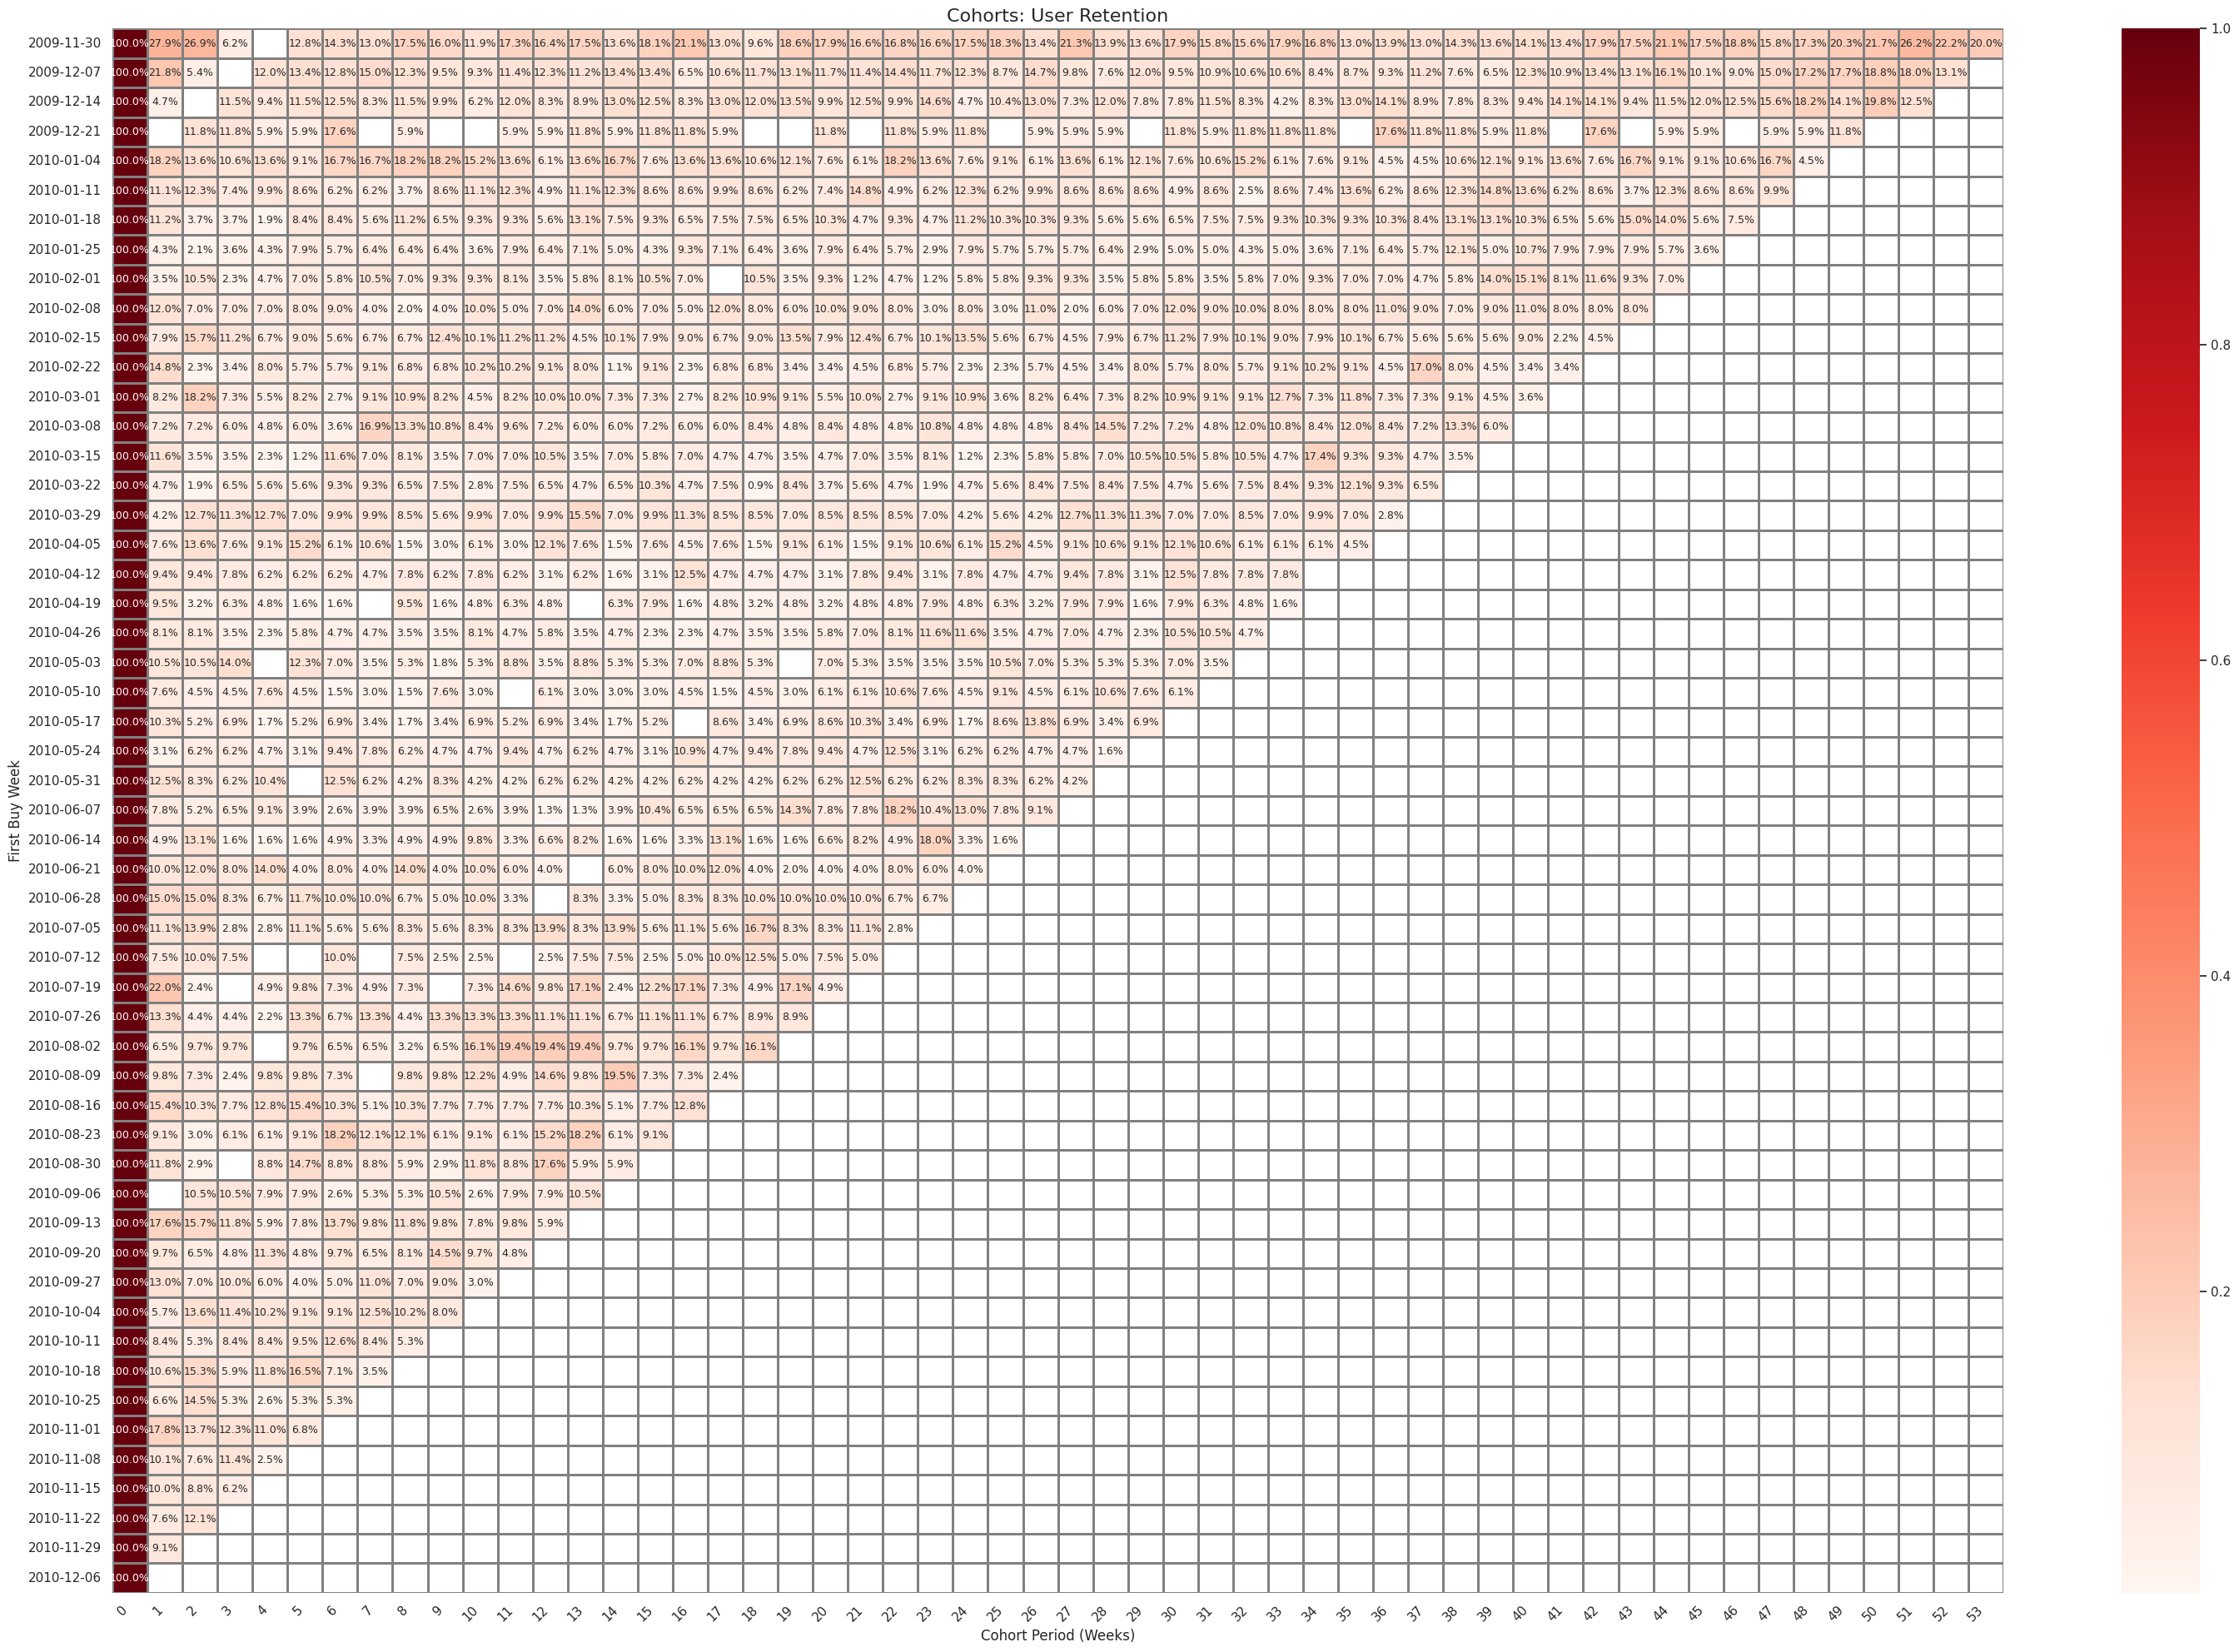

In [ ]:
retention_pivot.index = pd.to_datetime(retention_pivot.index).strftime('%Y-%m-%d')
sns.set(style='white')
plt.figure(figsize=(30, 20))
plt.title('Cohorts: User Retention', fontsize=16)


sns.heatmap(retention_pivot,
    annot=True,
    fmt='.1%',
    linewidths=1,
    linecolor='gray',
    cmap='Reds',
    annot_kws={"size": 9}
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.ylabel('First Buy Week')
plt.xlabel('Cohort Period (Weeks)')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px


retention_pivot.index = pd.to_datetime(retention_pivot.index)

retention_pivot.index = retention_pivot.index.strftime('%Y-%m-%d')
retention_pivot.columns = retention_pivot.columns.astype(str)

fig = px.imshow(
    retention_pivot.values,
    x=retention_pivot.columns,
    y=retention_pivot.index,
    labels={
        "x": "Cohort Period (Weeks)",
        "y": "First Buy Week",
        "color": "Retention"
    },
    color_continuous_scale="Reds",
    text_auto=".1%",
    aspect="auto"
)


fig.update_yaxes(type='category')

fig.update_layout(
    title="Cohorts: User Retention",
    width=2000,
    height=950
)
fig.show()


The first-week retention rate is decreasing for each new cohort. Whereas the first-week retention rate for the cohort that joined between April 29 and May 5 was 69.9%, for the June 10-16 cohort it was 24.3%. So in six weeks the retention rate fell by 45.6 percentage points. This means that user behavior is changing with every new cohort. Maybe traffic sources have been badly chosen or the support team's work is getting worse.

# Calculating Churn Rates in Python


Finding the churn rate is easy: we just need to compare the number of users with the number at the previous period. We can use the method pct_change() (percentage change). It finds the percentage change in a column compared with the value in the previous row. If you apply this method together with grouping, it will run within the group.

In [ ]:
cohorts.sample(5)

,first_buy_week,cohort_lifetime,customer_id,firstweekcustomer,retention
1111,2010-06-28,3,5,60,0.083333
991,2010-05-24,16,7,64,0.109375
538,2010-02-22,24,2,88,0.022727
680,2010-03-22,4,6,107,0.056075
1027,2010-05-31,24,4,48,0.083333


In [ ]:
cohorts['churn_rate'] = cohorts.groupby(['first_buy_week'])['customer_id'].pct_change()
cohorts.head(10)

,first_buy_week,cohort_lifetime,customer_id,firstweekcustomer,retention,churn_rate
1970-01-01,2009-11-30,0,469,469,1.000000,NaN
1970-01-01,2009-11-30,1,131,469,0.279318,-0.720682
1970-01-01,2009-11-30,2,126,469,0.268657,-0.038168
1970-01-01,2009-11-30,3,29,469,0.061834,-0.769841
1970-01-01,2009-11-30,5,60,469,0.127932,1.068966
1970-01-01,2009-11-30,6,67,469,0.142857,0.116667
1970-01-01,2009-11-30,7,61,469,0.130064,-0.089552
1970-01-01,2009-11-30,8,82,469,0.174840,0.344262
1970-01-01,2009-11-30,9,75,469,0.159915,-0.085366
1970-01-01,2009-11-30,10,56,469,0.119403,-0.253333


<Axes: title={'center': 'Cohorts: Churn Rate'}, xlabel='cohort_lifetime', ylabel='first_buy_week'>

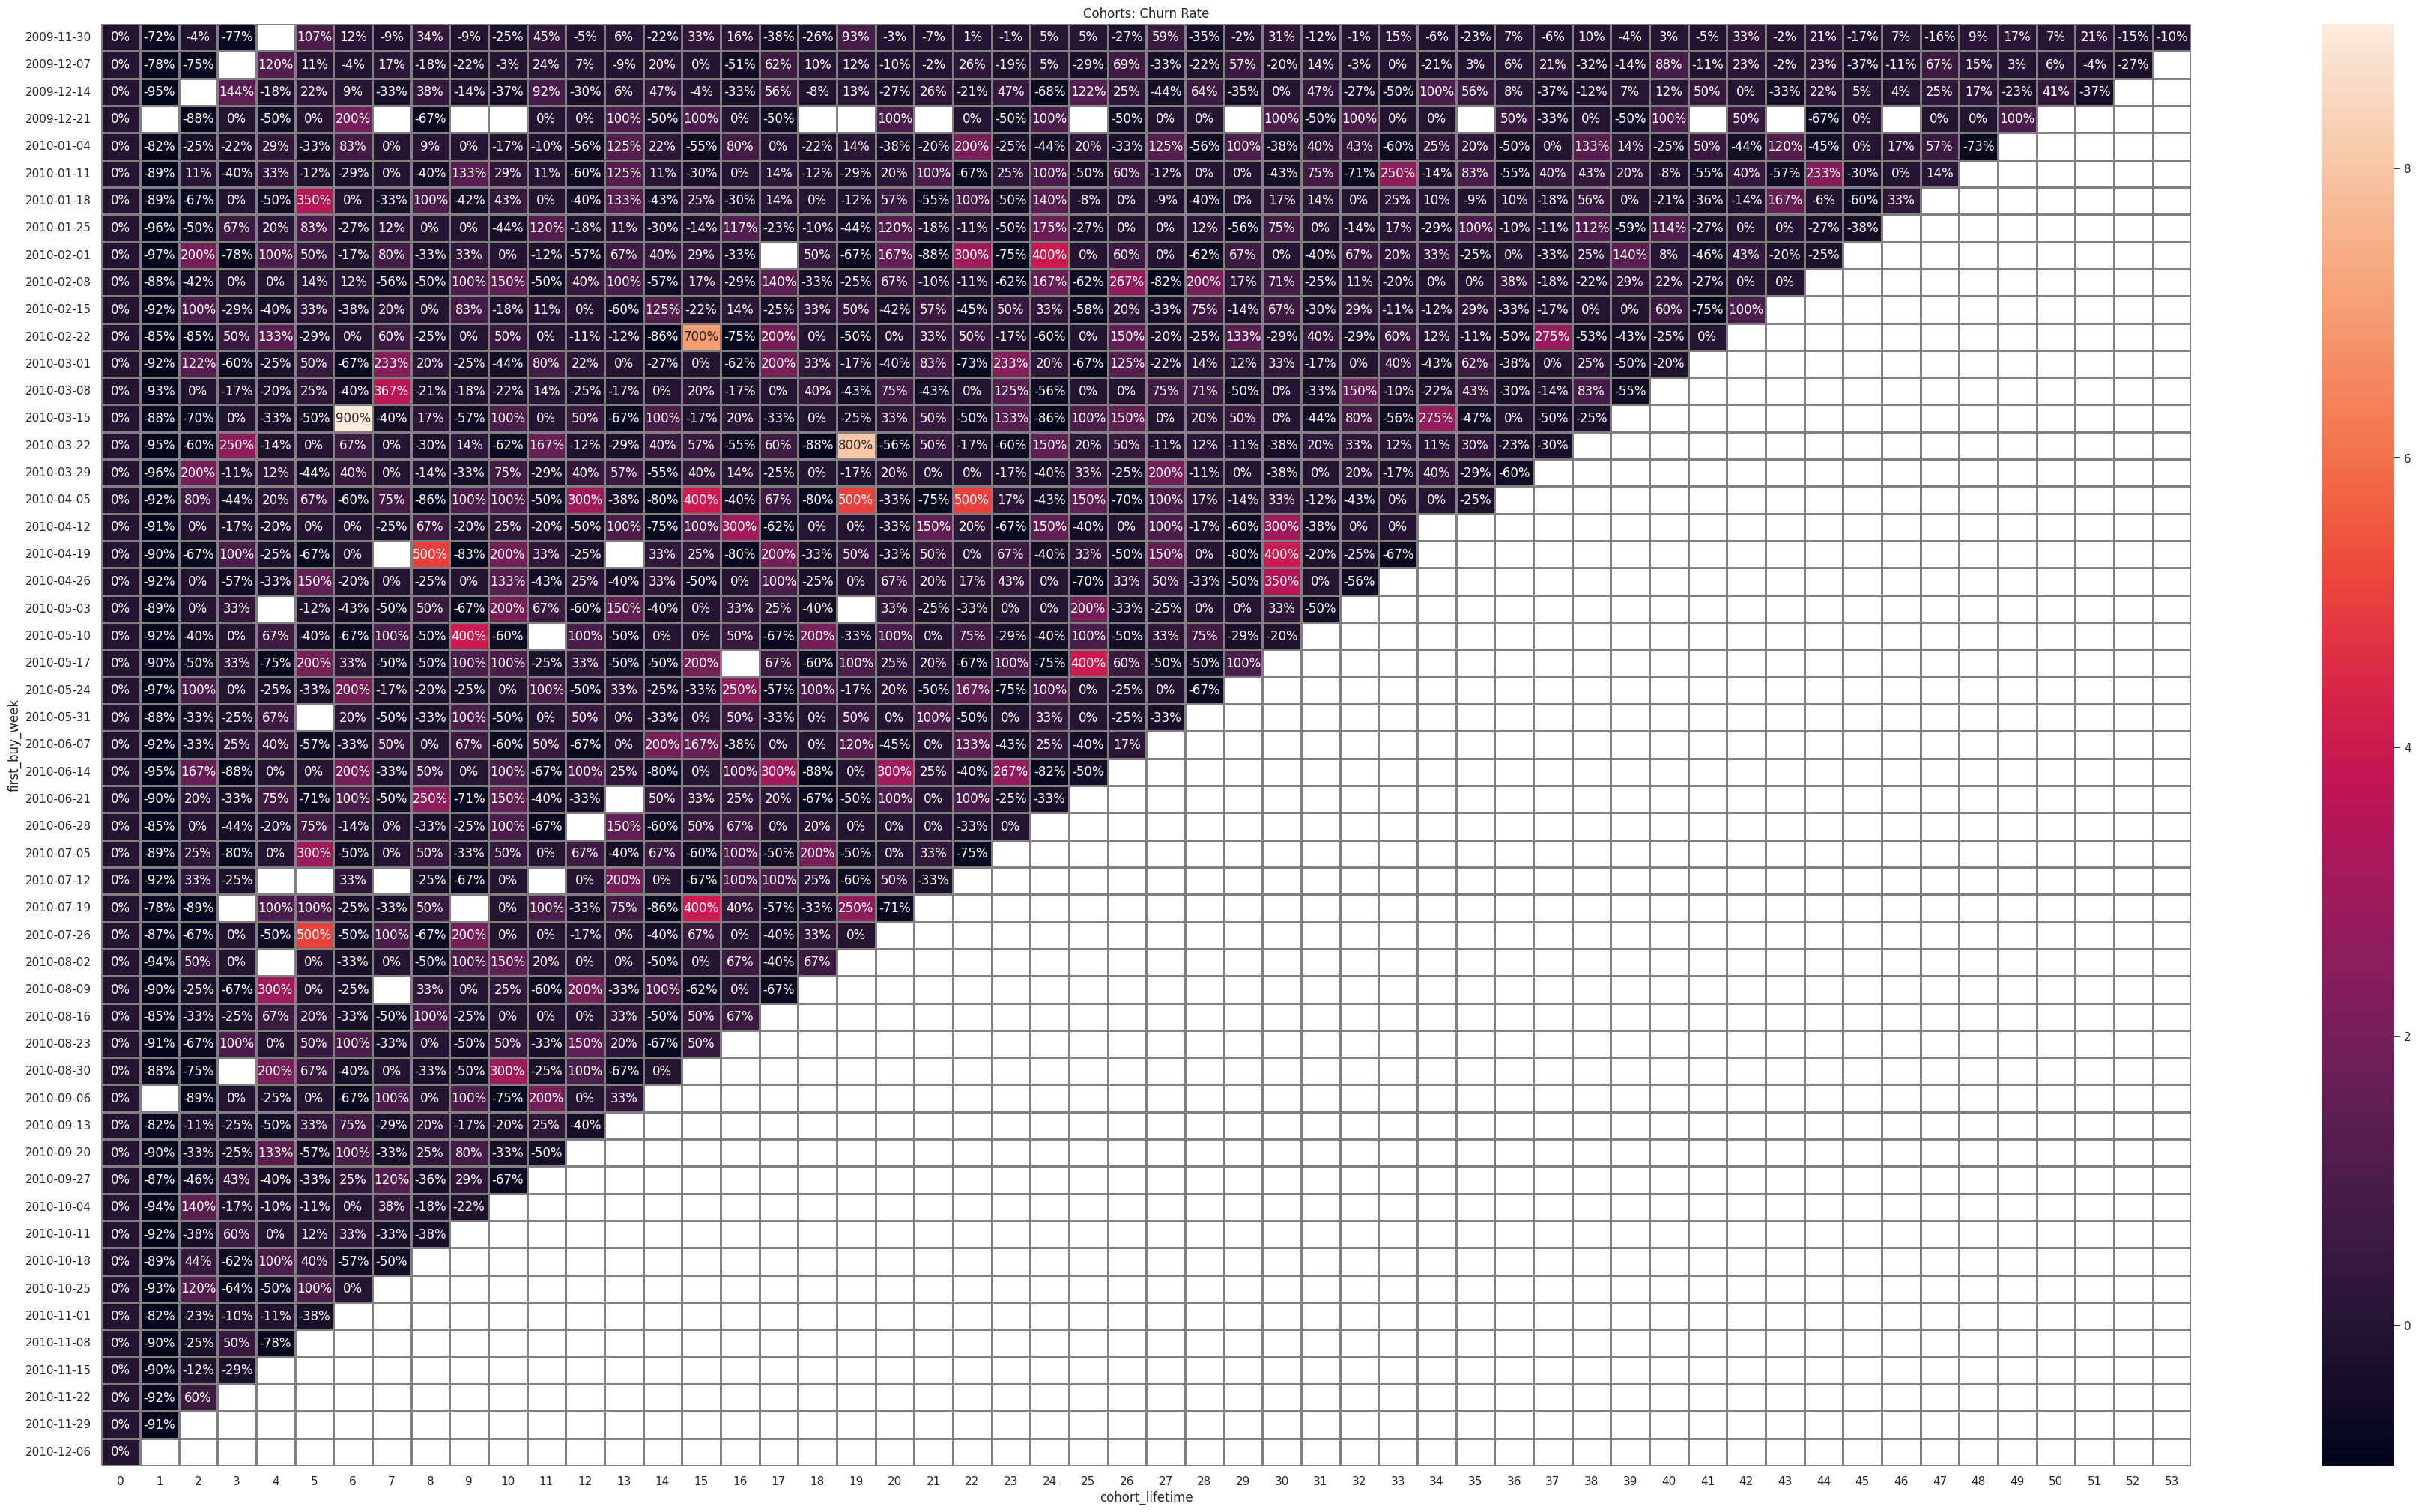

In [ ]:



churn_pivot = cohorts.pivot_table(
    index='first_buy_week',
    columns='cohort_lifetime',
    values='churn_rate',
    aggfunc='sum',
)
churn_pivot.index = pd.to_datetime(churn_pivot.index).strftime('%Y-%m-%d')
sns.set(style='white')
plt.figure(figsize=(45, 25))
plt.title('Cohorts: Churn Rate')
sns.heatmap(churn_pivot, annot=True, fmt='.0%', linewidths=1, linecolor='gray')
